In [2]:
'''Import all necessary libraries'''

import pandas as pd
import matplotlib.pyplot as plt

In [6]:
'''Read the dataset'''
df = pd.read_csv('dataset_with_outliers.csv') # Load the dataset
df.head()  # Show the first 5 rows of the dataset

,feature,target
0,0.926178,2.523524
1,1.909417,5.593312
2,-1.398568,-4.685085
3,0.562969,1.466761
4,-0.650643,-1.763277


In [7]:
df.shape  # Show the number of rows and columns of the dataset

(100, 2)

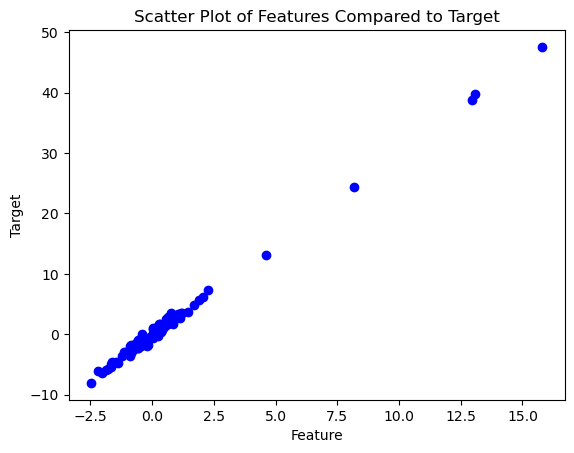

In [8]:
'''Plot a scatter plot and visualize the data'''
plt.scatter(df['feature'], df['target'], color='blue', marker='o') # Scatter plot of the data
plt.xlabel('Feature') # Label for x-axis
plt.ylabel('Target') # Label for y-axis
plt.title('Scatter Plot of Features Compared to Target') # Title of the plot
plt.show() # Display the plot

In [13]:
'''Calculate Q1 (25th percentile) and Q3 (75th percentile)'''
Q1 = df['feature'].quantile(0.25) # Calculate the first quartile
Q3 = df['feature'].quantile(0.75) # Calculate the third quartile

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1 # Calculate the interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR # Calculate the lower bound
upper_bound = Q3 + 1.5 * IQR # Calculate the upper bound

# Identify the outliers
outliers = df[(df['feature'] < lower_bound) | (df['feature'] > upper_bound)] # Identify the outliers

# Display outliers
print(f'Outliers of the Dataset:') # Print the header
print(outliers) # Print the outliers

Outliers of the Dataset:
      feature     target
95   8.195169  24.430734
96  15.796649  47.553014
97   4.594683  13.158493
98  13.079678  39.701048
99  12.965506  38.804068


In [14]:
'''Remove outliers'''
df_cleaned = df[(df['feature'] >= lower_bound) & (df['feature'] <= upper_bound)] # Remove the outliers

# Display the cleaned data frame
print(f'Cleaned Data Frame:') # Print the header
print(df_cleaned) # Print the cleaned data frame

# Save the cleaned data frame to a new CSV file
cleaned_csv_path = 'dataset_without_outliers.csv' # Define the path to save the cleaned data frame
df_cleaned.to_csv( cleaned_csv_path, index=False) # Save the cleaned data frame to a new CSV
print(f"Cleaned dataset saved to {cleaned_csv_path}") # Print the message

Cleaned Data Frame:
     feature    target
0   0.926178  2.523524
1   1.909417  5.593312
2  -1.398568 -4.685085
3   0.562969  1.466761
4  -0.650643 -1.763277
..       ...       ...
90  0.071566  0.571198
91 -0.477657 -1.553135
92  0.478980  1.249529
93  0.333662  1.356466
94  1.037540  3.334751

[95 rows x 2 columns]
Cleaned dataset saved to dataset_without_outliers.csv


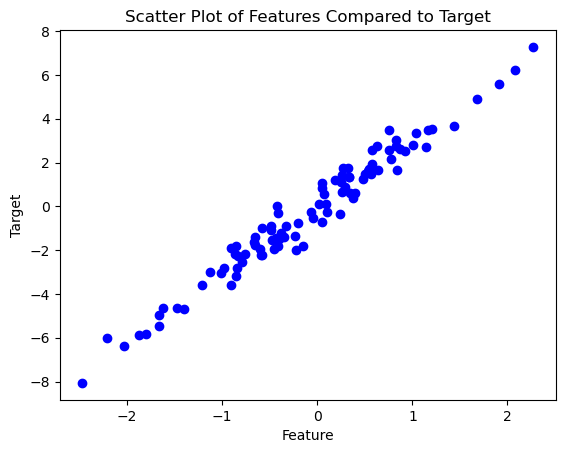

In [16]:
'''Plot a scatter plot and visualize the data without outliers'''
plt.scatter(df_cleaned['feature'], df_cleaned['target'], color='blue', marker='o') # Scatter plot
plt.xlabel('Feature') # Label for x-axis
plt.ylabel('Target') # Label for y-axis
plt.title('Scatter Plot of Features Compared to Target') # Title of the plot
plt.show() # Display the plot